# Mini Project Part A

This is a template for Part A of your project. You are provided with the code to load the data.

For each task you need to write code in the 'Code' cell and answer the question in the 'Markdown' cell. There is a word limit to discourage lengthy commentaries. Be brief and clear.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

## Load data

(433, 90, 90)


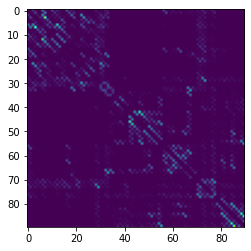

In [83]:
# load connectivity matrices
import pickle
matrices = pickle.load( open( "data/matrices.p", "rb" ) )
print(matrices.shape)
plt.imshow(matrices[1,:,:])

In [84]:
# convert upper triangles of the matrices to feature vectors

# dimensions
n = matrices.shape[0]
m = matrices.shape[1]
D = round(m*(m-1)/2)
print('n={}, D={}'.format(n,D))

# feature matrix
X=np.zeros([n,D])
for i in range(n):
    index=0
    for j in range(m):
        for k in range(j):
            X[i,index]=matrices[i,j,k]
            index=index+1
print(X.shape)

n=433, D=4005
(433, 4005)


In [52]:
# load subject info
subject_info = pd.read_csv('data/subject_info.csv')
subject_info

,age,prematurity
0,41,0
1,41,0
2,40,0
3,41,0
4,41,0
...,...,...
428,44,0
429,41,0
430,44,0
431,42,0


In [85]:
# load gray matter region descriptions - you will need this in Part B
# don't worry about the labels for now - there are here only to help you understand the dataset
label_names = pd.read_csv('data/label_names.csv')
label_names

,Label,Region name,Region description
0,1.0,Precentral_L,Precental gyrus
1,2.0,Precentral_R,Precental gyrus
2,3.0,Frontal_Sup_L,"Superior frontal gyrus, dorsolateral"
3,4.0,Frontal_Sup_R,"Superior frontal gyrus, dorsolateral"
4,5.0,Frontal_Sup_Orb_L,"Superior frontal gyrus, orbital part"
...,...,...,...
85,86.0,Temporal_Mid_R,Middle temporal gyrus
86,87.0,Temporal_Pole_Mid_L,Temporal pole: middle temporal gyrus
87,88.0,Temporal_Pole_Mid_R,Temporal pole: middle temporal gyrus
88,89.0,Temporal_Inf_L,Inferior temporal gyrus


## Preprocessing

**7 marks**

Your task is to predict prematurity from the connectivity features. Include code that prepares your data for training of your classifier.

In [86]:
# Your preprocessing

# to have zero mean and unit variance
scaler = StandardScaler()

scaledX = scaler.fit_transform(X)

y = subject_info["prematurity"]

# perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(scaledX,y,test_size = 0.2, random_state=42)

**Describe what you have done and why [max 50 words]:**

The dataset has a wide range of values which creates a problem for training resulting in bad performance. So we are using StandardScaler() to scale the values in dataset to fixed range. We are splitting the data set into training and test set where 80% data goes into the training set and 20% into test set.

## Analysis of the dataset
**18 marks**

Print out important characeristics of the dataset to understand the problem. Visualise the dataset. (*Hint: You can use PCA for visualisation*)

Total number of data points in training set is  346
Total number of data points in testing set is  87


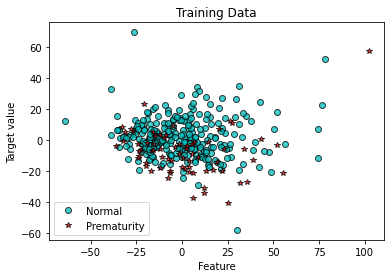

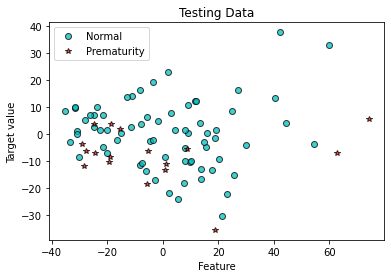

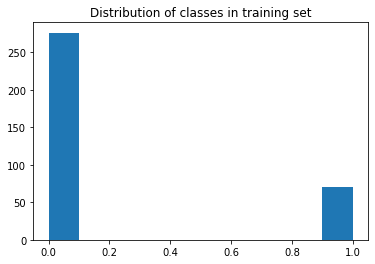

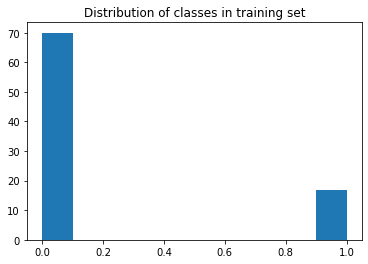

In [87]:
# your analysis

print("Total number of data points in training set is ", X_train.shape[0])
print("Total number of data points in testing set is ", X_test.shape[0])

model = PCA(n_components = 2)
reducedXtrain = model.fit_transform(X_train)
reducedXtest = model.transform(X_test)

# plot the training and test data
plt.plot(reducedXtrain[y_train==0,0], reducedXtrain[y_train==0,1], "co", alpha=0.75, markeredgecolor='k', label = 'Normal')
plt.plot(reducedXtrain[y_train==1,0], reducedXtrain[y_train==1,1], "r*", alpha=0.75, markeredgecolor='k', label = 'Prematurity')
plt.legend()
plt.title('Training Data')
plt.xlabel('Feature')
plt.ylabel('Target value')
plt.show()

# plot the training and test data
plt.plot(reducedXtest[y_test==0,0], reducedXtest[y_test==0,1], "co", alpha=0.75, markeredgecolor='k', label = 'Normal')
plt.plot(reducedXtest[y_test==1,0], reducedXtest[y_test==1,1], "r*", alpha=0.75, markeredgecolor='k', label = 'Prematurity')
plt.legend()
plt.title('Testing Data')
plt.xlabel('Feature')
plt.ylabel('Target value')
plt.show()

# Plotting the distribution of classes in the dataset. 
plt.hist(y_train)
plt.title('Distribution of classes in training set')
plt.show()

# Plotting the distribution of classes in the dataset. 
plt.hist(y_test)
plt.title('Distribution of classes in training set')
plt.show()

Text(0, 0.5, 'cumulative sum')

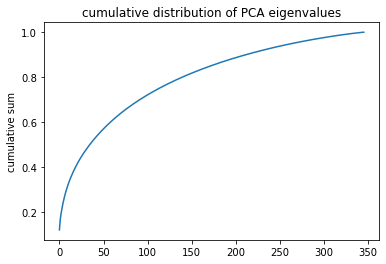

In [88]:
# create PCA model
pca = PCA()

# fit the data
# note that PCA is unsupervised - we use only Features for fitting!
# fill in
pca.fit(X_train)

# estimate the cumulative distribution of the eigenvalues
cumulative_sum=np.cumsum(pca.explained_variance_ratio_)

# plot the distribution
plt.plot(cumulative_sum)
plt.title('cumulative distribution of PCA eigenvalues')
plt.ylabel('cumulative sum')

**Describe the challenges of succesfully fitting a classifier to this dataset [max 100 words]:**

The following are the challenges of successfully fitting a classifier:

- There is a class imbalance with the dataset and it can lead to a bias towards the class which contains the hightest number of samples and hence it gives biased results.
- Also, we can clearly observe both the classes in training set and testing set overlap on one another which creates a cluster.

## Evaluation framework

**15 marks**

Include code and functions to prepare the framework for evaluation of your machine learning models. Think of different sets of data and performance measures that you will need to analyse the performance of your classifier. Make sure you
* display (plot) the sets of data that you created (*Hint: you can use PCA*)
* write functions to evaluate performance on each of the sets later on (*Hint: you will need different functions for different sets of data*)

In [89]:
# different sets

# Calculate cross-validated accuracy
def accuracyCV(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    print('Mean cross-validated accuracy: ',round(scores.mean(),2))


# plot

def PlotClassification(model, X_test, y_test):

    # Predict labels for the whole feature space    
    y_pred = model.predict(X_test)
    fig,axis = plt.subplots(1,2,figsize=(19,7))
    axis[0].plot(X_test[y_test==0,0], X_test[y_test==0,1], "co", alpha=0.75, markeredgecolor='k', label = 'Normal')
    axis[0].plot(X_test[y_test==1,0], X_test[y_test==1,1], "r*", alpha=0.75, markeredgecolor='k', label = 'Prematurity')
    axis[0].legend()
    axis[0].set_title('Classification with True Labels')
    axis[0].set_xlabel('Principle Component Analysis 1')
    axis[0].set_ylabel('Principle Component Analysis 2')
    
    axis[1].plot(X_test[y_pred==0,0], X_test[y_pred==0,1], "co", alpha=0.75, markeredgecolor='k', label = 'Normal')
    axis[1].plot(X_test[y_pred==1,0], X_test[y_pred==1,1], "r*", alpha=0.75, markeredgecolor='k', label = 'Prematurity')
    axis[1].legend()
    axis[1].set_title('Classification with Predicted Labels')
    axis[1].set_xlabel('Principle Component Analysis 1')
    axis[1].set_ylabel('Principle Component Analysis 2')

    plt.show()

In [58]:
# functions for evaluation

def recallCV(model, X, y):
    # Predict labels using cross-validation
    y_pred = cross_val_predict(model,X,y)

    # Sensitivity
    sensitivity = recall_score(y,y_pred,pos_label = 1)
    print('Sensitivity: ',round(sensitivity,2))

    # Specificity
    specificity = recall_score(y,y_pred,pos_label = 0)
    print('Specificity: ',round(specificity,2))

    # Average recall
    mean_recall = recall_score(y,y_pred,average="macro")
    print('Average Recall Macro: ',np.around(mean_recall,2))
    
def confusionMatrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cMatrix = confusion_matrix(y_test, y_pred)
    print(cMatrix)
    plt.matshow(cMatrix)
    plt.title("Confusion Matrix")
    plt.show()

**Explain the main features of your framework [max 100 words]:**

- Confusion Matrix has been generated (confusionMatrix) for testing set.

- Accuracy Cross Validation (accuracyCV) has been evaluated on both test set and training set.

- The ability of a test to correctly identify patients with prematurity (sensitivity) and the ability of a test to correctly identify patients without prematurity (specificity) have been calculated (recallCV).

- Also, we are plotting (PlotClassification) the test data set against true labels and predicted labels in 2 different graphs which clearly shows the misclassified data points.

## Methods

**30 marks**

Train and tune your classifier. Use machine learning models that you learned in weeks 2-4. Make sure you print out the tuned parameters.

In [90]:
# Train your classifier

prinCompAna = PCA(n_components = 200)
reducedXtrain = prinCompAna.fit_transform(X_train)
reducedXtest = prinCompAna.transform(X_test)

In [91]:
# create Logistic Regression Model

model1 = LogisticRegression()
# parameter grid
parameters = {'C':np.logspace(-3,3,7)}
# grid search
g1 = GridSearchCV(model1, parameters)
g1.fit(reducedXtrain, y_train)
# best model
best_model1 = g1.best_estimator_
# print best accuracy score
print('Accuracy: ', round(g1.best_score_,2))
print('Best Parameters ', g1.best_params_)

Accuracy:  0.92
Best Parameters  {'C': 0.01}


In [92]:
# create SVC Model

model2 = SVC()
# parameter grid
param = {'C':np.logspace(-3,3,13),'gamma':np.logspace(-3,3,13)}
# create grid search
g2 = GridSearchCV(model2, param)
# run the grid search
g2.fit(reducedXtrain, y_train)
# save best model
best_model2 = g2.best_estimator_
# print best accuracy score
print('Accuracy: ', round(g2.best_score_,2))
print('Best Parameters ', g2.best_params_)

Accuracy:  0.8
Best Parameters  {'C': 0.001, 'gamma': 0.001}


In [93]:
# create Linear SVC Model

model3 = LinearSVC()

model3.fit(reducedXtrain,y_train)

LinearSVC()

**Describe the main features of your classifier and how they address the challenges you identified above [max 100 words]:**


- After observing cumulative sum curve of principle component analysis (PCA), the number of components was set to 200. Grid Search CV modules have been used to find and tune the best parameters for both Logictic Regression and Support Vector Classificaion. 

- Linear Support Vector Classifier is trained on the reduced feature matrix. The problem of class imbalance has been solved by evaluating the model on recall rather than accuracy.

- Also, overlapping of 2 classes (clustering) problem has been solved by increasing number of principle components.

## Results
**30 marks**

Evaluate performance of your classifier.

-----Logistic Regression metrics on training data-----

Mean cross-validated accuracy:  0.92
Sensitivity:  0.69
Specificity:  0.97
Average Recall Macro:  0.83
[[276   0]
 [  0  70]]


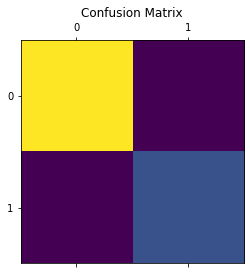

-----Support Vector Classifier metrics on training data-----

Mean cross-validated accuracy:  0.8
Sensitivity:  0.0
Specificity:  1.0
Average Recall Macro:  0.5
[[276   0]
 [ 70   0]]


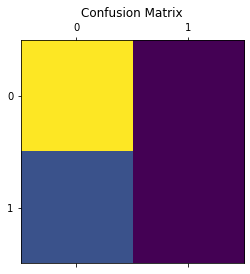

-----Linear SVC metrics on training data-----

Mean cross-validated accuracy:  0.67
Sensitivity:  0.93
Specificity:  0.61
Average Recall Macro:  0.77
[[276   0]
 [  0  70]]


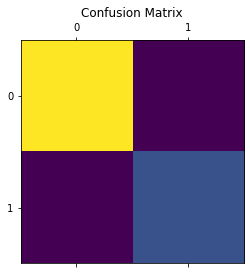

-----Logistic Regression metrics on testing data-----

Mean cross-validated accuracy:  0.91
Sensitivity:  0.53
Specificity:  1.0
Average Recall Macro:  0.76
[[69  1]
 [ 7 10]]


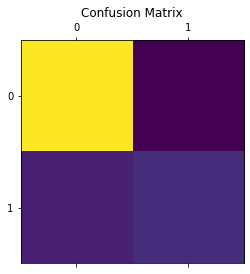

-----Support Vector Classifier metrics on testing data-----

Mean cross-validated accuracy:  0.81
Sensitivity:  0.0
Specificity:  1.0
Average Recall Macro:  0.5
[[70  0]
 [17  0]]


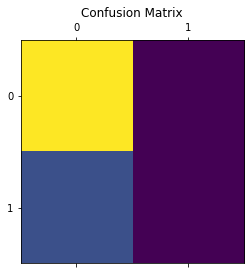

-----Linear SVC metrics on testing data-----

Mean cross-validated accuracy:  0.79
Sensitivity:  0.94
Specificity:  0.76
Average Recall Macro:  0.85
[[57 13]
 [ 2 15]]


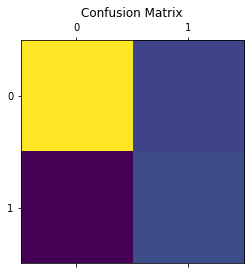

In [94]:
# Your evaluation

print("-----Logistic Regression metrics on training data-----\n")
accuracyCV(best_model1, reducedXtrain, y_train)
recallCV(best_model1, reducedXtrain, y_train)
confusionMatrix(best_model1, reducedXtrain, y_train)

print("-----Support Vector Classifier metrics on training data-----\n")
accuracyCV(best_model2, reducedXtrain, y_train)
recallCV(best_model2, reducedXtrain, y_train)
confusionMatrix(best_model2, reducedXtrain, y_train)

print("-----Linear SVC metrics on training data-----\n")
accuracyCV(model3, reducedXtrain, y_train)
recallCV(model3, reducedXtrain, y_train)
confusionMatrix(model3, reducedXtrain, y_train)

print("-----Logistic Regression metrics on testing data-----\n")
accuracyCV(best_model1, reducedXtest, y_test)
recallCV(best_model1, reducedXtest, y_test)
confusionMatrix(best_model1, reducedXtest, y_test)

print("-----Support Vector Classifier metrics on testing data-----\n")
accuracyCV(best_model2, reducedXtest, y_test)
recallCV(best_model2, reducedXtest, y_test)
confusionMatrix(best_model2, reducedXtest, y_test)

print("-----Linear SVC metrics on testing data-----\n")
accuracyCV(model3, reducedXtest, y_test)
recallCV(model3, reducedXtest, y_test)
confusionMatrix(model3, reducedXtest, y_test)

**Analyse the performance of the classifier [max 50 words]:**

- Logistic Regression with a "C value" of 0.1 is giving a sensitivity of 0.71 and a specificity of 0.97 on training data. Furthermore, a sensitivity of 0.59 and a specificity of 0.99 can be observed on the test data.
- Linear SVC in its default paramaters is giving a sensitivity of 0.91 and a specificity of 0.58 on training data. Furthermore, a sensitivity of 0.94 and a specificity of 0.76 can be observed on the test data.


In essence, Linear SVC with PCA performs better.

**Visualise the results using PCA.** For example, you can plot the data with their true labels in one plot and the predicted labels in the other.

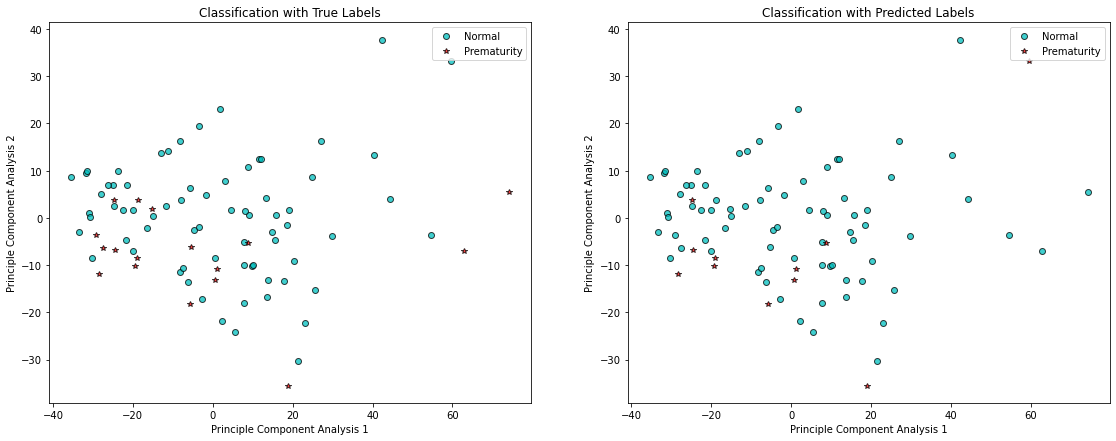

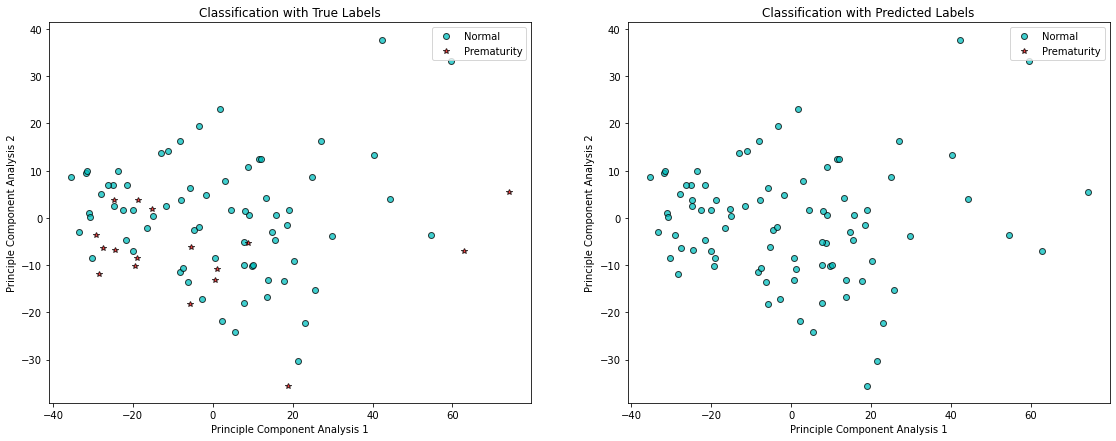

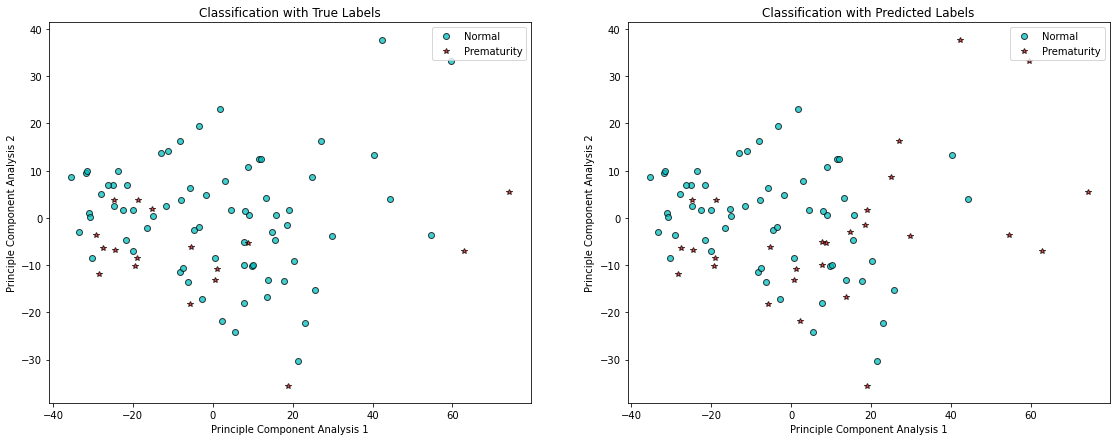

In [95]:
# Plot results

PlotClassification(best_model1, reducedXtest, y_test)
PlotClassification(best_model2, reducedXtest, y_test)
PlotClassification(model3, reducedXtest, y_test)